In [1]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")
env.unwrapped.configure({
    "action": {"type": "ContinuousAction"},  # Ensure continuous action
})
# Wrap the environment
env.reset()

(array([[ 1.        ,  0.90739906,  0.25      ,  0.3125    ,  0.        ],
        [ 1.        ,  0.10464889, -0.25      , -0.01543026,  0.        ],
        [ 1.        ,  0.20141236, -0.25      , -0.02373946,  0.        ],
        [ 1.        ,  0.30110726,  0.25      , -0.01362653,  0.        ],
        [ 1.        ,  0.41001832,  0.        , -0.03967122,  0.        ]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': array([-0.8824699,  0.7143706], dtype=float32),
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 0.3333333333333333,
   'high_speed_reward': 0.8333333333333334,
   'on_road_reward': 1.0,
   'reverse_reward': 0.0,
   'stopping_penalty': 0}})

In [20]:
# Create action noise for exploration
n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# Create the DDPG model
model = DDPG(
    "MlpPolicy",
    env,
    action_noise=action_noise,
    learning_rate=0.0003,
    gamma=0.99,
    buffer_size=1000000,
    tau=0.005,
    batch_size=64,
    verbose=1,
    tensorboard_log="ddpg_highway_tensorboard"
)

# Train the model
model.learn(total_timesteps=10000, tb_log_name="ddpg1")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ddpg_highway_tensorboard\ddpg1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.25     |
|    ep_rew_mean     | 0.262    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4        |
|    time_elapsed    | 1        |
|    total_timesteps | 5        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.38     |
|    ep_rew_mean     | 0.258    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 4        |
|    time_elapsed    | 2        |
|    total_timesteps | 11       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.5      |
|    ep_rew_mean     | 0.172    |
| time/              |          |
|    episode

In [ ]:
model.set_env(env)
model.learn(total_timesteps=5000, tb_log_name="ddpg1",reset_num_timesteps=False)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ddpg_highway_tensorboard\ddpg1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 24.2     |
| time/              |          |
|    episodes        | 804      |
|    fps             | 3        |
|    time_elapsed    | 31       |
|    total_timesteps | 15120    |
| train/             |          |
|    actor_loss      | -51.4    |
|    critic_loss     | 0.426    |
|    learning_rate   | 0.0003   |
|    n_updates       | 15019    |
---------------------------------


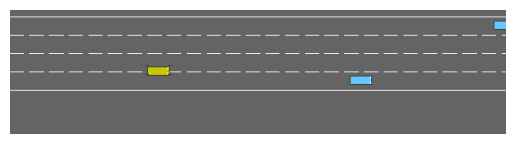

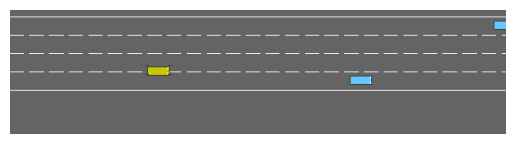

In [27]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# modewl = TD3.load("td3_highway_model")
# # Create the environment
# env = gym.make("highway-v1",render_mode="rgb_array")

# # Configure the environment for continuous actions
# env.unwrapped.configure({
#     "action": {"type": "ContinuousAction"},
#     "duration": 40,  # [s]
#     "lanes_count": 4,
#     "vehicles_count": 50,
#     "controlled_vehicles": 1,
#     "initial_lane_id": None,
#     "ego_spacing": 2,
#     "collision_reward": -1,  
#     "right_lane_reward": 0.4,
#     "high_speed_reward": 0.8,
#     "lane_change_reward": 0,
#     "reward_speed_range": [10, 30],
#     "reverse_reward": -2,
#     "stopping_penalty": -2,
#     "normalize_reward": True,
#     "offroad_terminal": False,
# })

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)


    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [30]:
# Save the trained model
model.save("ddpg_highwayv1")

In [2]:
model = DDPG.load("ddpg_highwayv1")

Testing TD3 Model on Highway-v0 Environment
Episode 1: Reward = 32.45, Length = 40 timesteps, Crash: False
Episode 2: Reward = 31.73, Length = 40 timesteps, Crash: False
Episode 3: Reward = 32.24, Length = 40 timesteps, Crash: False
Episode 4: Reward = 15.46, Length = 21 timesteps, Crash: True
Episode 5: Reward = 30.69, Length = 40 timesteps, Crash: False
Episode 6: Reward = 31.49, Length = 40 timesteps, Crash: False
Episode 7: Reward = 30.86, Length = 40 timesteps, Crash: False
Episode 8: Reward = 31.41, Length = 40 timesteps, Crash: False
Episode 9: Reward = 29.82, Length = 38 timesteps, Crash: True
Episode 10: Reward = 32.02, Length = 40 timesteps, Crash: False
Episode 11: Reward = 22.49, Length = 40 timesteps, Crash: False
Episode 12: Reward = 30.78, Length = 40 timesteps, Crash: False
Episode 13: Reward = 6.62, Length = 9 timesteps, Crash: True
Episode 14: Reward = 31.73, Length = 40 timesteps, Crash: False
Episode 15: Reward = 30.55, Length = 40 timesteps, Crash: False
Episode 16

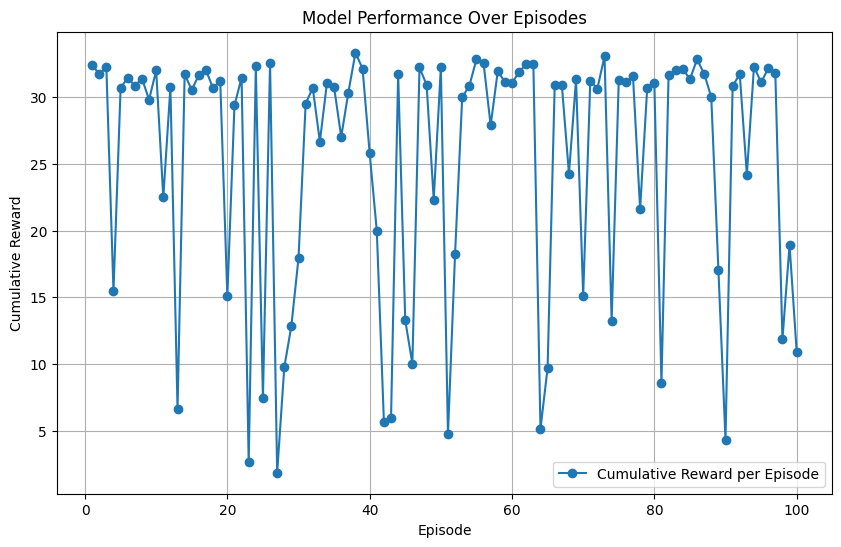

In [3]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

timestep_rewards = []
cumulative_rewards = []
episode_lengths = []
crashes = 0  # Track number of crashes
timesteps = []

# Run the trained model for testing
current_timestep = 0
total_episodes = 100

print("Testing TD3 Model on Highway-v0 Environment")

for episode in range(total_episodes):  
    done = truncated = False
    obs, info = env.reset()
    total_reward = 0
    episode_length = 0
    episode_crash = False  # Track crash per episode

    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)

        # Accumulate rewards and track timesteps
        total_reward += reward
        current_timestep += 1
        episode_length += 1
        env.render()

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

        # Log timestep data
        timestep_rewards.append(reward)
        timesteps.append(current_timestep)

    # Update statistics
    cumulative_rewards.append(total_reward)
    episode_lengths.append(episode_length)
    crashes += int(episode_crash)  # Count if the episode had a crash

    print(f"Episode {episode + 1}: Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

env.close()

# Compute statistics
mean_reward = sum(cumulative_rewards) / total_episodes
mean_episode_length = sum(episode_lengths) / total_episodes
crash_rate = crashes / total_episodes  # Percentage of episodes with crashes

print(f"\nMean Reward: {mean_reward:.2f}")
print(f"Mean Episode Length: {mean_episode_length:.2f}")
print(f"Crash Rate: {crash_rate:.2%}")

# Cumulative Rewards Plot
episodes = range(1, len(cumulative_rewards) + 1)
plt.figure(figsize=(10, 6))
plt.plot(episodes, cumulative_rewards, marker='o', label="Cumulative Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Model Performance Over Episodes")
plt.legend()
plt.grid(True)
plt.show()
